# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set).

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code.

Split the X_train, Y_train into train and validation based on an 80:20 split. For a given dataset, kernel parameter and regularisation value run gradient descent on the regularised kernel logistic loss on training set, with some learning rate eta. Try different etas, and choose the best eta (the eta that achieves the lowest R(alpha)), based on the alpha  you get after 1000 iterations.

For the classification data sets A and B, report the best kernel and regularisation parameters for the RBF kernel.  Choose the best kernel and regularisation parameter based on the accuracy of the model given by the optimisation procedure. Report the training and test zero-one error (or 1-accuracy) for those hyperparameters. 

For both  the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.


In [47]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def train_pred_logistic_regression(X_train, Y_train, X_test, kernel,eta, reg_param, kernel_param, num_iter_gd):
    
    n1,d1 = np.shape(X_train)
    XY_train = np.append((X_train.T),Y_train)
    XY_t = XY_train.reshape(d1+1,n1)
    XY_train = XY_t.T
    np.random.shuffle(XY_train)
    X_valid = XY_train[0:int(n1*0.2),0:-1]
    Y_valid = XY_train[0:int(n1*0.2),-1  ]
    X_train = XY_train[int(n1*0.2): ,0:-1]
    Y_train = XY_train[int(n1*0.2): ,-1  ]
    #print(np.shape(X_valid),np.shape(Y_valid),np.shape(X_train),np.shape(Y_train))
    
    n,d = np.shape(X_train)
    if kernel =='linear':
        def Ker(u,v): return u.T @ v
    elif kernel == 'poly':
        def Ker(u,v): return (u.T @ v)**(kernel_param)
    elif kernel == 'rbf':
        def Ker(u,v): return np.exp(-1*(((u-v).T)@(u-v))*(kernel_param))
    
    
    alpha = np.random.rand(n,1)
    K = np.ones((n,n))
    for pp in range(n):
        for pk in range(n):
            K[pp,pk]=Ker(X_train[pp,:],X_train[pk,:])
            
    for num in range(num_iter_gd):
        kkk= alpha.T @ K*Y_train
        grad= (1/n)*(K*Y_train)@(1/(1 + np.exp(-kkk))).T
        alpha = alpha - eta*(grad-reg_param*K@alpha) 
    
    Y_pred = Y_valid.copy()
    for m in range(np.shape(X_valid)[0]):
        prec= 0
        for c in range(n):
            prec= prec + alpha[c]*Ker(X_train[c,:],X_valid[m,:]) 
        if prec>= 0 :
            Y_pred[m]= -1
        else :
            Y_pred[m]= 1
    valid_accuracy = sum(abs(Y_pred+Y_valid))*(0.5)/(np.shape(X_valid)[0])
    
    Y_test = X_test[:,0].copy()
    for m in range(np.shape(X_test)[0]):
        prec= 0
        for c in range(n):
            prec= prec + alpha[c]*Ker(X_train[c,:],X_test[m,:]) 
        if prec>= 0 :
            Y_test[m]=-1
        else :
            Y_test[m]=+1
    return valid_accuracy ,Y_test
        
    
def return_best_hyperparam(X_train, Y_train, X_test,num_iter_gd): # give appropriate arguments, return appropriate variables
    kernels =[0.1,0.5,1,5,10]
    reg_params=[0,0.00001,0.0001,0.001,0.01,0.1,1,10]
    etas=[0.05,0.1,0.5,1]
    acc1= []
    acc2= []
    acc3= []
    for kern in kernels:
        accu, Y_tes = train_pred_logistic_regression(X_train, Y_train, X_test,'rbf',0.1, 0, kern, num_iter_gd)
        acc1.append([accu,kern])
    for reg in reg_params:
        accu, Y_tes = train_pred_logistic_regression(X_train, Y_train, X_test,'rbf', 0.1 ,reg, 1, num_iter_gd)
        acc2.append([accu,reg])
    for eta in etas:
        accu, Y_tes = train_pred_logistic_regression(X_train, Y_train, X_test,'rbf',eta , 0, 1, num_iter_gd)
        acc3.append([accu,eta])
        
#     print(acc1)
#     print(acc2)
#     print(acc3)
    #print(np.size(acc1))
    acc1 = np.asarray(acc1)
    acc2 = np.asarray(acc2)
    acc3 = np.asarray(acc3)
    acc_max1 = np.argmax(acc1[:,0])
    acc_max2 = np.argmax(acc2[:,0])
    acc_max3 = np.argmax(acc3[:,0])
   # acc_max3 = np.argmax(acc3[:,0])
    best1 = acc1[acc_max1]
    best2 = acc2[acc_max2]
    best3 = acc3[acc_max3]
    return best1,best2,best3




TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for the 2 synthetic datasets .  

### Error Table
| <!-- -->| Learning rate|Regularization|Kernel parameter |  Training Accuracy | Testing Accuracy  |
|---|---|---|---|---|---|
| __DatasetA__  | 0.5   | 0.00001    | 1  |     0.996  |  0.9933  | 
| __DatasetB__  | 0.1     | 0.0001   | 0.75  |   0.8 | 0.82  |

## Observations

* Learning rate is really crucial to the system.If the learning rate is too high then the error will not decrease and if its too low error will not decrease hence a suitable middle value is taken .
- The kernel parameter decides the weight of each point.The higher the kernal parameter the more will be the weigtage of positive points.
- The accuracy increases with number of iterations of gradient descent.
- A suitable regularization is needed in gardient descent as the weights can be set to 0 for minimising R(alpha).But a large value also creates problems in the form of underfitting or bias.

In [ ]:
# CodeWrite : Use the functions above to get the numbers you report below. 
data_A = np.load('dataset_A.npz')
data_B = np.load('dataset_B.npz')
data_C = np.load('dataset_C.npz')
data_D = np.load('dataset_D.npz')
np.warnings.filterwarnings('ignore')
#print(train_pred_logistic_regression(data_A.f.arr_0, data_A.f.arr_1, data_A.f.arr_2, kernel='rbf',reg_param=0.00000,kernel_param=1, num_iter_gd=100))
#print(train_pred_logistic_regression(data_B.f.arr_0, data_B.f.arr_1, data_B.f.arr_2, kernel='rbf',reg_param=0.0000,kernel_param=1., num_iter_gd=100))
print(return_best_hyperparam(data_A.f.arr_0, data_A.f.arr_1, data_A.f.arr_2,100))
print(return_best_hyperparam(data_B.f.arr_0, data_B.f.arr_1, data_B.f.arr_2,100))

test 1.0
train 1.0


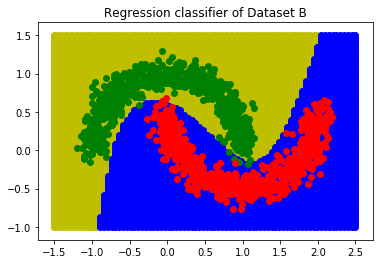

test 0.8
train 0.8466666666666667


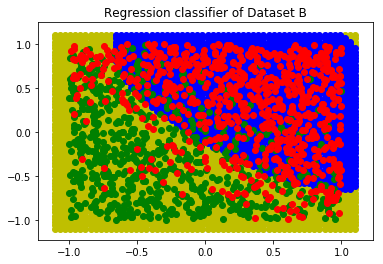

In [42]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
def plotter(X_test,Y_test,X,Y):
    #plt.figure()
    X_less = X[Y<0,:]
    X_more = X[Y>0,:]
    X_test_less = X_test[Y_test<0,:]
    X_test_more = X_test[Y_test>0,:]
    plt.scatter(X_test_less[:,0],X_test_less[:,1],c='y')
    plt.scatter(X_test_more[:,0],X_test_more[:,1],c='b')
    plt.scatter(X_less[:,0],X_less[:,1],c='g')
    plt.scatter(X_more[:,0],X_more[:,1],c='r')
    return None

n1 =80
n2 =80
x1 =  np.linspace(-1.5, 2.5, n1)
x2 = np.linspace(-1, 1.5, n2)
xx1,xx2 = np.meshgrid(x1,x2)
X1= np.asarray(xx1).reshape((n1*n2,1))
Y1=np.asarray(xx2).reshape((n1*n2,1))
X_taken = np.concatenate((X1, Y1), axis=1)
accurac, Y_taken = train_pred_logistic_regression(data_A.f.arr_0, data_A.f.arr_1, X_taken,'rbf',0.5 , 0.00001, 1, 100)
accurac, Y_tak = train_pred_logistic_regression(data_A.f.arr_0, data_A.f.arr_1, data_A.f.arr_2,'rbf',0.5 , 0.00001, 1, 100)
print('test',accurac)
accurac, Y_tak = train_pred_logistic_regression(data_A.f.arr_0, data_A.f.arr_1, data_A.f.arr_0,'rbf',0.5 , 0.00001, 1, 100)
print('train',accurac)
plotter(X_taken,Y_taken,data_A.f.arr_0, data_A.f.arr_1)
plt.title('Regression classifier of Dataset B')
plt.show()

n1 =60
n2 =60
x1 =  np.linspace(-1.1, 1.1, n1)
x2 = np.linspace(-1.1, 1.1, n2)
xx1,xx2 = np.meshgrid(x1,x2)
X1= np.asarray(xx1).reshape((n1*n2,1))
Y1=np.asarray(xx2).reshape((n1*n2,1))
X_taken = np.concatenate((X1, Y1), axis=1)
accurac, Y_taken = train_pred_logistic_regression(data_B.f.arr_0, data_B.f.arr_1, X_taken,'rbf',0.1 , 0.0001, 0.75, 100)
accurac, Y_tak = train_pred_logistic_regression(data_B.f.arr_0, data_B.f.arr_1, data_B.f.arr_2,'rbf',0.1 ,0.0001 ,0.75, 100)
print('test',accurac)
accurac, Y_tak = train_pred_logistic_regression(data_B.f.arr_0, data_B.f.arr_1, data_B.f.arr_0,'rbf',0.1 ,0.0001 ,0.75, 100)
print('train',accurac)
plotter(X_taken,Y_taken,data_B.f.arr_0, data_B.f.arr_1)
plt.title('Regression classifier of Dataset B')
plt.show()

# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the via using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set (dataset A,B,C,D) report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [8]:
# CodeWrite cell
# Write SVM classifier using SKlearn, write code for choosing best hyper parameters.
# write only functions here
np.warnings.filterwarnings('ignore')
def train(X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
    c = [0.001,0.01,0.1,1,5,10,100]
    gamma = [0.001,0.01,0.1,1,5,10,100]
    deg = [1,2,3,4]
    
    c1 = -1
    c2 = -1
    c3 = -1
    g2 = -1
    g3 = -1
    d2 = -1
    
    mis = 9999999999999
    for k in c:
        clf = SVC(C = k,kernel = 'linear')
        clf.fit(X_train,Y_train)
        Y_pred = clf.predict(X_test)
        temp = 0
        for i in range(len(Y_pred)):
            if Y_pred[i] != Y_test[i]:
                temp = temp + 1
        #print(k,temp/len(Y_pred))
        if temp<mis:
            mis = temp
            c1 = k
            
    #print("Best c1",c1)
    mis = 9999999999999
    for k in c:
        for g in gamma:
            clf = SVC(C = k,gamma = g,kernel = 'rbf')
            clf.fit(X_train,Y_train)
            Y_pred = clf.predict(X_test)
            temp = 0
            for i in range(len(Y_pred)):
                if Y_pred[i] != Y_test[i]:
                    temp = temp + 1
            #print(k,g,temp/len(Y_pred))
            if temp<mis:
                mis = temp
                c3 = k
                g3 = g
            
    #print("BEST c3",c3,g3)
    mis = 99999999999999
    for k in c:
        for g in gamma:
            for d in deg: 
                clf = SVC(C = k,gamma = g,degree = d, kernel = 'poly',max_iter = 30000)
                clf.fit(X_train,Y_train)
                Y_pred = clf.predict(X_test)
                temp = 0
                for i in range(len(Y_pred)):
                    if Y_pred[i] != Y_test[i]:
                        temp = temp + 1
                #print(k,g,d,temp/len(Y_pred))
                if temp<mis:
                    mis = temp
                    c2 = k
                    g2 = g
                    d2 = d
    
    #print("BEST c2",c2,g2,d2)
    return c1,c2,c3,g2,g3,d2
            



In [9]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.
for i in ['A','B','C','D']:
    l = np.load("dataset_"+str(i)+".npz")
    lst=l.files
    X_train=l[lst[0]]
    Y_train=l[lst[1]]
    X_test=l[lst[2]]
    Y_test=l[lst[3]]
    c1,c2,c3,g2,g3,d2=train(X_train,Y_train)
    #print("BEST "+str(i),c1,c2,c3,g2,g3,d2)

#linear accuracy
l = np.load("dataset_D.npz")
lst=l.files
X_train=l[lst[0]]
Y_train=l[lst[1]]
X_test=l[lst[2]]
Y_test=l[lst[3]]
clf  = SVC(C=100,kernel='linear')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
mis = 0
for i in range(len(Y_pred)):
    if Y_pred[i]!=Y_test[i]:
        mis = mis + 1


FileNotFoundError: [Errno 2] No such file or directory: 'Archive\\dataset_A.npz'

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
### Error Table(TRAIN)
| <!-- -->   | linear  |  poly | rbf  |
|---|---|---|---|
| __DatasetA__  | 0.123  | 0.07  | 0.0  |
| __DatasetB__  | 0.176  | 0.166  | 0.17  |
| __DatasetC__  | 0.073  | 0.007  | 0.006  |
| __DatasetD__  | 0.05  | 0.3  | 0.1  |

### Hyper Parameters
| <!-- -->   | linear  |  poly | rbf  |
|---|---|---|---|
| __DatasetA__  | c=5  | c=0.1,g=1,d=3  | c=0.1,g=10  |
| __DatasetB__  | c=0.01  | c=10,g=0.1,d=3  | c=0.1,g=0.01  |
| __DatasetC__  | c=0.001  | c=0.01,g=0.01,d=2  | c=5,g=0.001  |
| __DatasetD__  | c=5  | c=0.01,g=0.01,d=2  | c=5,g=0.001  |


### Error Table(TEST)
| <!-- -->   | linear  |  poly | rbf  |
|---|---|---|---|
| __DatasetA__  | 0.124  | 0.01  | 0.004  |
| __DatasetB__  | 0.182  |  0.194 | 0.19  |
| __DatasetC__  | 0.097  | 0.034  | 0.016  |
| __DatasetD__  | 0.0591  | 0.024 | 0.1183  |


## Observations

- As seen in the graph the Dataset A is not linearly seprable so the linear kernel gives the least accuracy when compared to the other kernels
- As seen Dataset B graph, it is not linearly seprable but the linear kernel has better accuracy when compared to poly and  rbf
- train errors are less when compared to test errors
- For linear kernel only C hyper parameter is used but poly C, gamma, degree is used in rbf only C, gamma are used

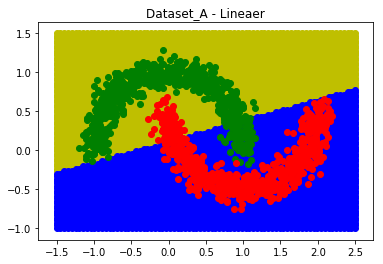

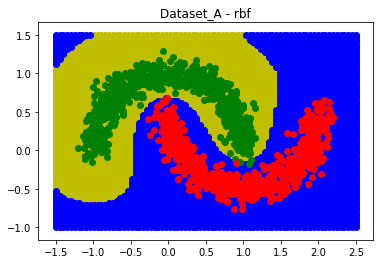

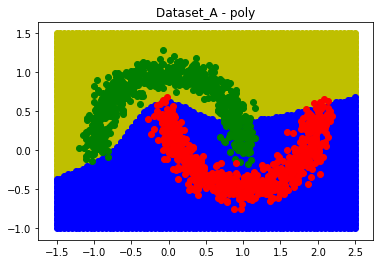

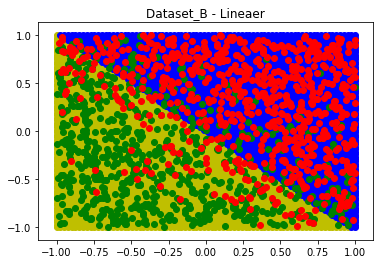

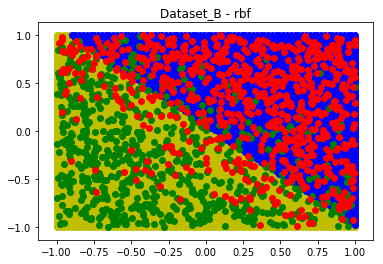

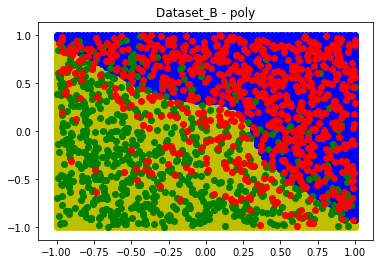

In [41]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

np.warnings.filterwarnings('ignore')
def plotter1(X,Y):
    #plt.figure()
    X_less = X[Y<0,:]
    X_more = X[Y>0,:]
    plt.scatter(X_less[:,0],X_less[:,1],c='g')
    plt.scatter(X_more[:,0],X_more[:,1],c='r')
    #plt.show()
    return None

def plotter2(X,Y):
    #plt.figure()
    X_less = X[Y<0,:]
    X_more = X[Y>0,:]
    plt.scatter(X_less[:,0],X_less[:,1],c='y')
    plt.scatter(X_more[:,0],X_more[:,1],c='b')
    #plt.show()
    return None


n1 =80
n2 =80
x1 =  np.linspace(-1.5, 2.5, n1)
x2 = np.linspace(-1.0, 1.5, n2)
xx1,xx2 = np.meshgrid(x1,x2)
X1= np.asarray(xx1).reshape((n1*n2,1))
Y1=np.asarray(xx2).reshape((n1*n2,1))
X = np.concatenate((X1, Y1), axis=1)

l = np.load("dataset_A.npz")
lst=l.files
X_train=l[lst[0]]
Y_train=l[lst[1]]
X_test=l[lst[2]]
Y_test=l[lst[3]]
#linear
clf = SVC(C=5,kernel='linear')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X)
plotter2(X,Y_pred)
plotter1(X_train,Y_train)
plt.title('Dataset_A - Lineaer')
plt.show()
#rbf
clf = SVC(C=0.1,gamma=10,kernel='rbf')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X)
plotter2(X,Y_pred)
plotter1(X_train,Y_train)
plt.title('Dataset_A - rbf')
plt.show()
#poly
clf = SVC(C=0.1,gamma=1,degree=3,kernel='poly',max_iter=30000)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X)
plotter2(X,Y_pred)
plotter1(X_train,Y_train)
plt.title('Dataset_A - poly')
plt.show()


n1 =80
n2 =80
x1 =  np.linspace(-1, 1, n1)
x2 = np.linspace(-1.0, 1, n2)
xx1,xx2 = np.meshgrid(x1,x2)
X1= np.asarray(xx1).reshape((n1*n2,1))
Y1=np.asarray(xx2).reshape((n1*n2,1))
X = np.concatenate((X1, Y1), axis=1)

l = np.load("dataset_B.npz")
lst=l.files
X_train=l[lst[0]]
Y_train=l[lst[1]]
X_test=l[lst[2]]
Y_test=l[lst[3]]
#linear
clf = SVC(C=0.01,kernel='linear')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X)
plotter2(X,Y_pred)
plotter1(X_train,Y_train)
plt.title('Dataset_B - Lineaer')
plt.show()
#rbf
clf = SVC(C=0.1,gamma=0.01,kernel='rbf')
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X)
plotter2(X,Y_pred)
plotter1(X_train,Y_train)
plt.title('Dataset_B - rbf')
plt.show()
#poly
clf = SVC(C=10,gamma=0.1,degree=3,kernel='poly',max_iter=30000)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X)
plotter2(X,Y_pred)
plotter1(X_train,Y_train)
plt.title('Dataset_B - poly')
plt.show()


# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Choose the number of training points at which you stop splitting the node further between 1,10 and 50. You are NOT allowed to use sklearn modules for this.)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For the classification data sets A and B report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

Also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [44]:
# CodeWrite cell
# Write Decision tree classifier from scratch, write code for choosing best node size to stop splitting.
# write only functions here
data_A = np.load('dataset_A.npz')
data_B = np.load('dataset_B.npz')
data_C = np.load('dataset_C.npz')
data_D = np.load('dataset_D.npz')
#data_A.f.arr_0
weights = []

def plotter(X,Y):
    #plt.figure()
    X_less = X[Y<0,:]
    X_more = X[Y>0,:]
    plt.scatter(X_less[:,0],X_less[:,1],c='g')
    plt.scatter(X_more[:,0],X_more[:,1],c='r')
    plt.show()
    return None
def accuracy(X,Y,feature,threshold):
    Y_p = (X[:,feature] - threshold)
    Y_pred1 = Y_p.copy()
    Y_pred2 = Y_p.copy()
    Y_pred1[Y_p*Y >= 0]= 1
    Y_pred1[Y_p*Y < 0] = 0 # calculates the number for + above threshold
    acc_1 = sum(Y_pred1)#/(np.shape(Y)[0])
    Y_pred2[Y_p*Y <= 0]= 1
    Y_pred2[Y_p*Y > 0] = 0 # calculates the number for + above threshold
    acc_2 = sum(Y_pred2)#/(np.shape(Y)[0])
    return acc_1,acc_2
           
def graph_maker(X_train ,Y_train,cuts ):
    num_examples , num_features = np.shape(X_train)
    vec_compare = []
    for feature in range(0,num_features):
        
        #print(np.shape(X_train[:,int(feature)]))
        max_features = max(X_train[:,feature])
        min_features = min(X_train[:,feature])
        if max_features != min_features:
            tuning = np.linspace(min_features,max_features,cuts)
            for value in tuning[1:-1]:
                vec_compare.append([feature,value,accuracy(X_train,Y_train,feature,value)[0],cuts])
                vec_compare.append([feature,value,accuracy(X_train,Y_train,feature,value)[1],cuts])        
    vec_comp = np.asarray(vec_compare)
    np.random.shuffle(vec_comp)
    max_acc_index = np.argmax(vec_comp[:,2])
    return vec_comp[max_acc_index,:]
    
iteration = 0

def tree_maker(X_train ,Y_train,min_node_size,cuts):
    global iteration
    iteration = iteration +1
    pp = iteration
    num_examples , num_features = np.shape(X_train)
    #plotter(X_train,Y_train)
    checker = sum(Y_train)/(np.shape(Y_train)[0])
    
    if checker == 1:
        weights.append((pp,0,0,-3,-3,+1))
    elif checker == -1:
        weights.append((pp,0,0,-2,-2,-1))
    elif num_examples <= min_node_size:
        if checker ==0 :
            k=1
        else:
            k = np.sign(checker)
        weights.append((pp,0,0,-1,-1,k))        
    else:
        feature,value,acc,sqr = graph_maker(X_train ,Y_train, cuts )
        Z = (X_train[:,int(feature)] - value)
        Y_pos = Y_train[Z >= 0]
        Y_neg = Y_train[Z < 0] 
        X_pos = X_train[Z >= 0,:]
        X_neg = X_train[Z < 0,:] 
        
        neg_p = tree_maker(X_neg ,Y_neg,min_node_size,cuts)
        pos_p = tree_maker(X_pos ,Y_pos,min_node_size,cuts)
        weights.append((pp,feature,value,pos_p,neg_p,0))
    return pp
    

In [45]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.

def predicter(X,Y,weight,i):
    weights = np.asarray(weight)
    finds = weights[:,0] 
    [[inp,feature,value,pos,neg,dec]] = weights[finds == i,:]
   # if pos <= 0:
        
    if dec == 0:
        Z = (X[:,int(feature)] - value)
        Y_pos = Y[Z >= 0]
        Y_neg = Y[Z < 0] 
        X_pos = X[Z >= 0,:]
        X_neg = X[Z < 0,:] 
        count_pos = predicter(X_pos ,Y_pos,weights,pos)
        count_neg = predicter(X_neg ,Y_neg,weights,neg)
        count = count_neg + count_pos
    else :
        count = abs(sum(Y + dec/(abs(dec)))*0.5)
        #print(count)
    return count
        
def graphing_2(X,weight,i):
    weights = np.asarray(weight)
    finds = weights[:,0] 
    [[inp,feature,value,pos,neg,dec]] = weights[finds == i,:]
    plt.title("The Visualisation of the given Tree")
    #plt.legend(("Negative","Positive"))
    if dec == 0:
        Z = (X[:,int(feature)] - value)
        X_pos = X[Z >= 0,:]
        X_neg = X[Z < 0,:] 
        graphing_2(X_pos ,weights,pos)
        graphing_2(X_neg ,weights,neg)
    elif dec > 0 :
        plt.scatter(X[:,0],X[:,1],c='b')
    elif dec<0 :
        plt.scatter(X[:,0],X[:,1],c='y')
    return None

weights = []
iteration =0
tree_maker(data_A.f.arr_0,data_A.f.arr_1,10,8)
print("training_A =",predicter(data_A.f.arr_0,data_A.f.arr_1,weights,1)/len(data_A.f.arr_1))
print("testing_A =",predicter(data_A.f.arr_2,data_A.f.arr_3,weights,1)/len(data_A.f.arr_3))

weights = []
iteration =0
tree_maker(data_B.f.arr_0,data_B.f.arr_1,10,9)
print("training_B =",predicter(data_B.f.arr_0,data_B.f.arr_1,weights,1)/len(data_B.f.arr_1))
print("testing_B =",predicter(data_B.f.arr_2,data_B.f.arr_3,weights,1)/len(data_B.f.arr_3))


weights = []
iteration =0
tree_maker(data_C.f.arr_0,data_C.f.arr_1,100,11)
print("training_C=",predicter(data_C.f.arr_0,data_C.f.arr_1,weights,1)/len(data_C.f.arr_1))
print("testing_C =",predicter(data_C.f.arr_2,data_C.f.arr_3,weights,1)/len(data_C.f.arr_3))


weights = []
iteration =0
tree_maker(data_D.f.arr_0,data_D.f.arr_1,70,20)
print("training_D =",predicter(data_D.f.arr_0,data_D.f.arr_1,weights,1)/len(data_D.f.arr_1))
print("testing_D =",predicter(data_D.f.arr_2,data_D.f.arr_3,weights,1)/len(data_D.f.arr_3))


training_A = 0.9926666666666667
testing_A = 0.988
training_B = 0.8586666666666667
testing_B = 0.814
training_C= 0.8593333333333333
testing_C = 0.8316498316498316
training_D = 0.955
testing_D = 0.9289940828402367


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

### Error Table
| <!-- -->   | minimum node size |  Training Accuracy | Testing Accuracy  |
|---|---|---|---|
| __DatasetA__  | 10 | 0.994  | 0.988  |
| __DatasetB__  | 10  | 0.856666  | 0.812  |
| __DatasetC__  | 100  | 0.86  | 0.828282828  |
| __DatasetD__  | 70  | 0.955  | 0.9289  |

## Observations

* For a tree, minimum node size is a really important regularization.If it is small the tree will overfit and if its too large the tree will underfit.
* Trees tend to make errors on complex datasets.
* Trees work well if there is proper boundary between the data.
* There is anather pyperparameter in the above code,which is the number of values taken to evaluate the thresholds. This value also makes an huge difference in the variance control of the tree.

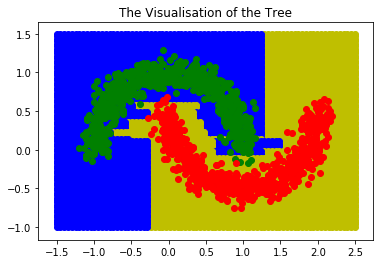

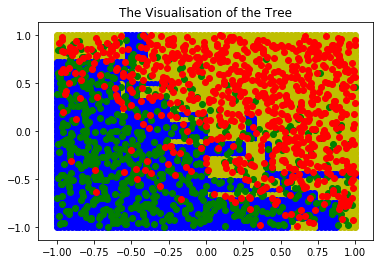

In [83]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

weights = []
iteration =0
tree_maker(data_A.f.arr_0,data_A.f.arr_1,10,8)
n1 =80
n2 =80
x1 =  np.linspace(-1.5, 2.5, n1)
x2 = np.linspace(-1.0, 1.5, n2)
xx1,xx2 = np.meshgrid(x1,x2)
X1= np.asarray(xx1).reshape((n1*n2,1))
Y1=np.asarray(xx2).reshape((n1*n2,1))
X = np.concatenate((X1, Y1), axis=1)
graphing_2(X,weights,1)
plotter(data_A.f.arr_0,data_A.f.arr_1)
#1/0.986
#0.992/0.99

weights = []
iteration =0
tree_maker(data_B.f.arr_0,data_B.f.arr_1,15,5)
n1 =80
n2 =80
x1 =  np.linspace(-1, 1, n1)
x2 = np.linspace(-1, 1, n2)
xx1,xx2 = np.meshgrid(x1,x2)
X1= np.asarray(xx1).reshape((n1*n2,1))
Y1=np.asarray(xx2).reshape((n1*n2,1))
X = np.concatenate((X1, Y1), axis=1)
graphing_2(X,weights,1)
plotter(data_B.f.arr_0,data_B.f.arr_1)

# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features taken per data=0.5).  Choose the number of trees to add in the forest by using a validation set. (You may use sklearn decision tree function, if you want)

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the via using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set (A,B,C,D) report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions (datasets A,B), also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

In [36]:
# CodeWrite cell
# Write Random Forest classifier assuming access to a decision tree learner, 
# write code for choosing best node size to stop splitting.
# write only functions here

def train(X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
    t1 = X_train
    t2 = X_test
    t3 = Y_train
    m,n = X_train.shape
    Y_pred = np.zeros(len(Y_test))
    err=9999999999
    ts = -1
    best = dict()
    for tree in [1,11,41,61,81,91,101,201,301,401,501,601,701,801,901]:
        tq = []
        obj = []
        for i in range(tree):
            temp = np.random.choice(m,int(m*0.5),replace= False)
            X_train = X_train[temp,:]
            Y_train = Y_train[temp]
            temp = np.random.choice(n,int(n*0.5),replace = False)
            tq.append(temp)
            X_train = X_train[:,temp]
            X_test = X_test[:,temp]
            clf = DecisionTreeClassifier()
            clf.fit(X_train,Y_train)
            obj.append(clf)
            temp = clf.predict(X_test)
            for j in range(len(temp)):
                Y_pred[j] = Y_pred[j] + temp[j]
            X_train = t1
            X_test = t2
            Y_train = t3
        mis = 0
        for i in range(len(Y_pred)):
            if Y_pred[i]>0:
                Y_pred[i]=1
            else:
                Y_pred[i]=-1
            if Y_pred[i]!=Y_test[i]:
                mis = mis + 1
        #print(mis/len(Y_pred))
        if((mis/len(Y_pred))<err):
            err = mis/len(Y_pred)
            ts = tree
            best['data'] = tq
            best['obj'] = obj
    #print(best['data'])
    return ts,err,best



In [37]:
# CodeWrite cell
# Write code here for generating the numbers that you report below.
for i in ['A','B','C','D']:
    l = np.load("dataset_"+str(i)+".npz")
    lst=l.files
    X_train=l[lst[0]]
    Y_train=l[lst[1]]
    X_test=l[lst[2]]
    Y_test=l[lst[3]]
    m,n = X_train.shape
    ts,err,best = train(X_train,Y_train)
    print(i,ts,err)
    obj = best['obj']
    data = best['data']
    Y_pred = np.zeros(len(Y_train))
    temp = X_train
    for j in range(len(obj)):
        X_train = X_train[:,data[j]]
        y = obj[j].predict(X_train)
        for k in range(len(y)):
            Y_pred[k] = Y_pred[k] + y[k]
        X_train = temp
    mis = 0
    for j in range(len(Y_pred)):
        if Y_pred[j]>0:
            Y_pred[j] = 1
        else:
            Y_pred[j] = -1
        if Y_pred[j]!=Y_train[j]:
            mis = mis + 1
    print(i,'train',mis/len(Y_pred))
    Y_pred = np.zeros(len(Y_test))
    temp = X_test
    for j in range(len(obj)):
        X_test = X_test[:,data[j]]
        y = obj[j].predict(X_test)
        for k in range(len(y)):
            Y_pred[k] = Y_pred[k] + y[k]
        X_test = temp
    mis = 0
    for j in range(len(Y_pred)):
        if Y_pred[j]>0:
            Y_pred[j] = 1
        else:
            Y_pred[j] = -1
        if Y_pred[j]!=Y_test[j]:
            mis = mis + 1
    print(i,'test',mis/len(Y_pred))


A 701 0.08
A train 0.018
A test 0.08
B 901 0.26
B train 0.05266666666666667
B test 0.308
C 101 0.03
C train 0.006
C test 0.04377104377104377
D 11 0.025
D train 0.0225
D test 0.029585798816568046


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  
### Error Table
| <!-- -->   | no.of Trees  |  train error | test error  |
|---|---|---|---|
| __DatasetA__  | 601  | 0.015  | 0.078  |
| __DatasetB__  | 91  | 0.065  | 0.338  |
| __DatasetC__  | 101  | 0.002  | 0.05  |
| __DatasetD__  | 41  | 0.015  | 0.0473  |

## Observations

- The random forest is constructed with trees of size 1,11,41,61,81,91,101,201,301,401,501,601,701,801,901 are used and best among them are selected using validation accuracy
- As we can see train error is very less when compared to test error since the forest is made by fitting training data
- In dataset A the +1 and -1 points seems to be saprable so the random forests give good accuracy but when considering dataset B the +1 and -1 points are not very seprable so the rfc doesnt give a good accuracy


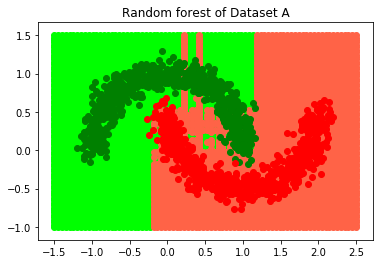

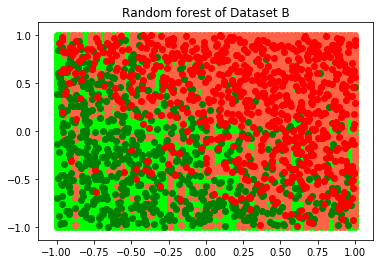

In [40]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
def plotter1(X,Y):
    #plt.figure()
    X_less = X[Y<0,:]
    X_more = X[Y>0,:]
    plt.scatter(X_less[:,0],X_less[:,1],c='g')
    plt.scatter(X_more[:,0],X_more[:,1],c='r')
    #plt.show()
    return None

def plotter2(X,Y):
    #plt.figure()
    X_less = X[Y<0,:]
    X_more = X[Y>0,:]
    plt.scatter(X_less[:,0],X_less[:,1],c='#00FF00')
    plt.scatter(X_more[:,0],X_more[:,1],c='#FF6347')
    #plt.show()
    return None

n1 =80
n2 =80
x1 =  np.linspace(-1.5, 2.5, n1)
x2 = np.linspace(-1.0, 1.5, n2)
xx1,xx2 = np.meshgrid(x1,x2)
X1= np.asarray(xx1).reshape((n1*n2,1))
Y1=np.asarray(xx2).reshape((n1*n2,1))
X = np.concatenate((X1, Y1), axis=1)

l = np.load("dataset_A.npz")
lst=l.files
X_train=l[lst[0]]
Y_train=l[lst[1]]
X_test=l[lst[2]]
Y_test=l[lst[3]]

ts,err,best = train(X_train,Y_train)
Y_pred = np.zeros(len(X))
obj = best['obj']
data = best['data']
temp = X
for j in range(len(obj)):
    X = X[:,data[j]]
    y = obj[j].predict(X)
    for k in range(len(y)):
        Y_pred[k] = Y_pred[k] + y[k]
    X = temp
plotter2(X,Y_pred)
plotter1(X_train,Y_train)
plt.title('Random forest of Dataset A')
plt.show()

n1 =80
n2 =80
x1 =  np.linspace(-1, 1, n1)
x2 = np.linspace(-1.0, 1, n2)
xx1,xx2 = np.meshgrid(x1,x2)
X1= np.asarray(xx1).reshape((n1*n2,1))
Y1=np.asarray(xx2).reshape((n1*n2,1))
X = np.concatenate((X1, Y1), axis=1)

l = np.load("dataset_B.npz")
lst=l.files
X_train=l[lst[0]]
Y_train=l[lst[1]]
X_test=l[lst[2]]
Y_test=l[lst[3]]

ts,err,best = train(X_train,Y_train)
Y_pred = np.zeros(len(X))
obj = best['obj']
data = best['data']
temp = X
for j in range(len(obj)):
    X = X[:,data[j]]
    y = obj[j].predict(X)
    for k in range(len(y)):
        Y_pred[k] = Y_pred[k] + y[k]
    X = temp
plotter2(X,Y_pred)
plotter1(X_train,Y_train)
plt.title('Random forest of Dataset B')
plt.show()
